
# Proyek Analisis Data: [Input Nama Dataset]

- Nama: Silvana Ovarista
- Email: silvana.ovarista.2205356@students.um.ac.id
- ID Dicoding: silvana_ova

# Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berubah sesuai musim?
- Seberapa sering pengguna terdaftar melakukan penyewaan dibandingkan dengan pengguna kasual?
- Bagaimana kondisi cuaca mempengaruhi rata-rata penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

Di tahap ini, saya menggunakan dataset penyewaan sepeda harian. Data ini mencakup informasi tentang jumlah penyewaan, kondisi cuaca, musim, dan  variabel lain yang digunakan untuk analisis.

1. Memuat tabel hour

In [30]:
hour_data = pd.read_csv('hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2. Memuat tabel day

In [31]:
day_data = pd.read_csv('day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insight:
- day.csv berisi data gabungan terkait penyewaan sepeda harian
- hour.csv berisi data yang lebih rinci yaitu terdapat informasi untuk setiap jam

## Accessing Data

Pada proses yang kedua, akan dilakukan penilaian kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

### 1. Menilai day_data

Sebelum melakukan analisis lebih lanjut, analisis dilakukan pada informasi dasar tentang dataset `day_data` untuk memahami struktur dan tipe data yang ada. Selain itu, dilakukan pemeriksaan untuk mengetahui apakah terdapat missing value di setiap kolom serta jumlah duplikasi untuk memastikan kebersihan data. Terakhir, diperoleh statistik deskriptif guna melihat distribusi dan karakteristik data, seperti rata-rata dan rentang nilai. Langkah-langkah ini penting supaya analisis yang dilakukan selanjutnya dapat lebih akurat

In [32]:
day_data.info()
day_data.isna().sum()
print("\n Jumlah duplikasi pada day.csv: ", day_data.duplicated().sum())
day_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

 Jumlah duplikasi pada day.csv:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### 2. Menilai hour_data

Analisis juga dilakukan pada informasi dasar tentang dataset `hour_data` untuk memahami struktur dan tipe data yang ada, dmn dengan menggunakan method method yang ada seperti `info()`, `isna()`, dan lainnya. Dan juga, dilakukan pemeriksaan untuk mengetahui apakah terdapat missing value di setiap kolom serta jumlah duplikasi untuk memastikan kebersihan data. Terakhir, diperoleh statistik deskriptif guna melihat distribusi dan karakteristik data, seperti rata-rata dan rentang nilai.

In [33]:
hour_data.info()
hour_data.isna().sum()
print("\nJumlah duplikasi pada hour.csv: ", hour_data.duplicated().sum())
hour_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Jumlah duplikasi pada hour.csv:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Jika diperhatikan, jumlah data pada `day_data` dan `hour_data` telah lengkap atau dengan kata lain tidak ada missing value maupun duplikasi data di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday di keduanya. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string).

**Insight:**
- Terdapat kesalahan tipe data pada kedua data baik `day_data` maupun `hour_data`
- Tidak terdapat duplikasi data maupun missing value pada kedua data

## Cleaning Data

Merupakan proses terakhir pada data wrangling yang dimana di tahap ini akan dilakukan pembersihan atau pembenaran berbagai masalah yang telah ditemukan pada proses assesing data sebelumnya.

### 1. Cleaning data pada `day_data`

Berdasarkan pada proses assesing data pada kedua data bisa diketahui terdapat kesalahan tipe data pada kolom `dteday'

Untuk mengatasi masalah ini, maka akan dilakukan pengnggantian tipe data pada kolom dteday. Proses ini dapat dilakukan menggunakan function `to_datetime()` yang disediakan oleh library pandas. 

In [34]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

Kode sebelumnya akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, maka dilakukan pemeriksaan kembali tipe data tersebut menggunakan method `info()`.

In [35]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [36]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat diketahui bahwa tipe data `dteday` milih kedua dataset telah berubah menjadi tipe data datetime

**Insight:**
- Telah dilakukan proses pengubahan tipe data milik `dteday` yang sebelumnya merupakan tipe data objek menjadi tipe data `datetime`

# Exploratory Data Analysis (EDA)

Ini merupakan tahap eksplorasi data yang berguna untuk menjawab pertanyaan bisnis yang sudah disebutkan sebelumnya

## 1. Explore day_data

Pengecekan rangkuman parameter statistik dari `day_data` dengan menggunakan method `describe()`

In [37]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Rata-rata Penyewaan: Rata-rata total penyewaan sepeda per hari adalah sekitar 4504. Ini menunjukkan bahwa, secara keseluruhan, sepeda lumayan sering digunakan.
- `cnt` Tertinggi dan Terendah: Penyewaan tertinggi mencapai 8714, sedangkan penyewaan terendah hanya 22. Ini menunjukkan adanya variasi besar dalam penggunaan sepeda, kemungkinan terkait dengan faktor-faktor seperti cuaca, musim, hari kerja ataupun tidak.
- Pengguna registered dibanding casual: Rata-rata pengguna terdaftar(3656) jauh lebih banyak dibandingkan pengguna kasual(848). Ini menunjukkan bahwa banyak pelanggan yang menjadi pengguna tetap, yang mungkin menunjukkan kepuasan pengguna terhadap layanan.

Selanjutnya adalah menganalisa apakah terdapat hubungan antara musim dengan jumlah penyewa

In [38]:
season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rental = day_data.groupby(by="season")['cnt'].mean()

season_rental.index = season_rental.index.map(season_names)
print("Rata-rata Penyewaan Berdasarkan Musim:\n", season_rental)

Rata-rata Penyewaan Berdasarkan Musim:
 season
Spring    2604.132597
Summer    4992.331522
Fall      5644.303191
Winter    4728.162921
Name: cnt, dtype: float64


Berdasarkan analisis rata-rata penyewaan sepeda per musim, ditemukan bahwa musim Semi/Spring (season = 1) memiliki rata-rata penyewaan terendah, yaitu 2.604, menunjukkan minat penyewa yang lebih rendah dibandingkan musim lainnya. Di sisi lain, musim Panas/Summer (season = 2) menunjukkan minat yang cukup baik dengan rata-rata 4.992. Musim Gugur/Fall (season = 3) memiliki rata-rata tertinggi, yaitu 5.644, yang menunjukkan minat penyewa paling tinggi. Terakhir, musim Dingin/Winter (season = 4) mencatat rata-rata 4.728, yang menunjukkan minat penyewa yang lumayan tinggi.

**Insight:**
- Musim Gugur/Fall mencatat total penyewaan tertinggi dengan rata-rata 5.644, diikuti oleh Musim Panas/Summer dengan rata-rata 4.992. Musim Dingin/Winter memiliki rata-rata penyewaan 4.728, sedangkan Musim Semi/Spring memiliki rata-rata terendah, yaitu 2.604. Hal ini menunjukkan bahwa penyewaan sepeda cenderung meningkat saat cuaca lebih hangat, terutama di musim gugur dan panas, sementara musim semi mencatat minat penyewaan yang paling rendah.
- Musim Gugur/Fall sebagai musim dengan rata-rata tertinggi mencerminkan bahwa kondisi cuaca di musim ini menarik lebih banyak orang untuk bersepeda dibandingkan musim lain, terutama saat cuaca mulai mendingin tetapi masih nyaman untuk aktivitas luar ruangan.

## 2. Explore hour_data

Sama seperti proses sebelumnya, maka dilakukan pengecekan rangkuman parameter statistik dari `hour_data` dengan menggunakan method `describe()`

In [39]:
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Rata-rata Penyewaan: Rata-rata total penyewaan sepeda per jam adalah sekitar 189. Ini menunjukkan bahwa, secara keseluruhan, sepeda lumayan sering digunakan.
- `cnt` Tertinggi dan Terendah: Penyewaan tertinggi mencapai 977, sedangkan penyewaan terendah hanya 1. Ini menunjukkan adanya variasi besar dalam penggunaan sepeda, kemungkinan terkait dengan faktor-faktor seperti cuaca, musim, hari kerja ataupun tidak.
- Pengguna registered dibanding casual: Rata-rata pengguna terdaftar(153) jauh lebih banyak dibandingkan pengguna kasual(35). Ini menunjukkan bahwa banyak pelanggan yang menjadi pengguna tetap, yang mungkin menunjukkan kepuasan pengguna terhadap layanan.

Selanjutnya menghitung total penyewaan sepeda per jam untuk melihat jam mana yang paling banyak dan paling sedikit penyewaannya.

In [40]:
rental_per_hour = hour_data.groupby('hr')['cnt'].sum()
print("Total Penyewaan per Jam:\n", rental_per_hour)

Total Penyewaan per Jam:
 hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


Total penyewaan per jam menunjukkan bahwa puncak aktivitas terjadi pada pagi dan sore hari, dengan penyewaan tertinggi mencapai 336.860 pada pukul 17:00 dan 309.772 pada pukul 18:00. Selain itu, pukul 08:00 pagi juga mencatat angka signifikan sebesar 261.001, yang mengindikasikan banyak pengguna menyewa sepeda untuk perjalanan di pagi hari. Setelah pukul 18:00, penyewaan mulai menurun, dan mencapai titik terendah pada pukul 23:00 dengan hanya 63.941 penyewaan. Pola ini menggambarkan kebiasaan masyarakat yang aktif menyewa sepeda untuk perjalanan pagi dan sore hari, terutama sebelum dan sesudah jam kerja, yang dapat memberikan wawasan penting dalam merencanakan penyediaan sepeda dan strategi pemasaran yang lebih tepat.

In [41]:
avg_rental_season_hour = hour_data.groupby(['season', 'hr'])['cnt'].mean().unstack()
print("Rata-rata Penyewaan Berdasarkan Musim:\n", avg_rental_season_hour)

Rata-rata Penyewaan Berdasarkan Musim:
 hr             0          1          2          3         4          5   \
season                                                                    
1       27.404494  18.140449  12.794118   7.102564  3.181818  10.701754   
2       56.842391  35.222826  23.380435  11.450549  6.211111  19.169399   
3       73.914439  43.720430  30.731183  15.752688  8.240642  26.454545   
4       56.333333  35.920455  23.765714  11.861272  7.267045  22.590909   

hr              6           7           8           9   ...          14  \
season                                                  ...               
1        40.792135  115.391061  235.167598  147.016760  ...  147.805556   
2        79.070652  221.483696  380.135870  233.983696  ...  265.777174   
3       101.315508  276.595745  421.297872  254.930851  ...  282.234043   
4        81.681818  231.607955  396.346591  239.443182  ...  266.011299   

hr              15          16          17          18    

Rata-rata penyewaan sepeda per musim menunjukkan bahwa **musim semi (season = 1)** memiliki puncak penyewaan pada pukul 17:00 dengan rata-rata 263,98, mulai meningkat sejak pukul 7:00 dan menurun tajam di malam hari. **Musim panas (season = 2)** mencatat puncak tertinggi pada pukul 17:00 dengan 518,85 penyewaan, dan aktivitas tinggi juga terlihat pada pukul 8:00 dengan 380,14 penyewaan. **Musim gugur (season = 3)** menunjukkan angka tertinggi di semua musim, terutama pada pukul 17:00 (572,14) dan 18:00 (547,22), menunjukkan minat penyewaan yang sangat kuat sepanjang hari. Sementara itu, **musim dingin (season = 4)** memiliki puncak penyewaan pada pukul 17:00 dengan 486,16 penyewaan, tetapi aktivitas menurun tajam setelah pukul 19:00. Secara keseluruhan, musim gugur dan panas mencatat penyewaan tertinggi, terutama pada sore hari, sedangkan musim semi dan dingin memiliki minat lebih rendah, meskipun masih ada lonjakan aktivitas di pagi dan sore hari.

**Insight:**
- Terdapat puncak penyewaan yang signifikan pada jam 8 dan 17, dengan rata-rata penyewaan tertinggi pada jam 17 (461.45).
- Penyewaan cenderung menurun pada malam hari, terutama setelah jam 20.
- Season atau musim ketiga mencatatkan penyewaan tertinggi secara konsisten sepanjang hari, terutama pada jam sore.
- Penyewaan cenderung meningkat pada jam-jam sibuk (pagi dan sore) dan menurun pada malam hari.

# Visualization & Explanatory Analysis

## Pertanyaan 1: Bagaimana pola penyewaan sepeda berubah sesuai musim?

Proses ini menghitung jumlah total penyewaan sepeda berdasarkan musim (season) akan dihitung menggunakan data dari day_data. Hasil perhitungan tersebut kemudian akan divisualisasikan melalui grafik histogram untuk memberikan gambaran yang lebih jelas.

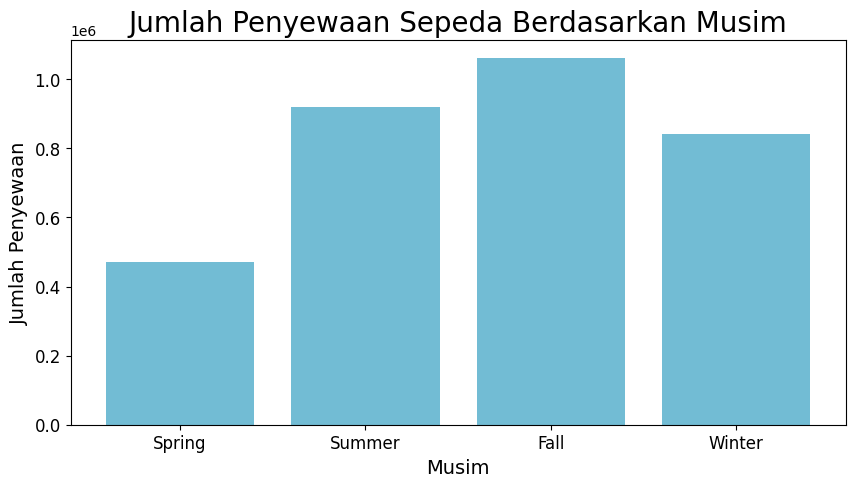

In [43]:
day_data['season_label'] = day_data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
rentals_by_season = day_data.groupby('season_label')['cnt'].sum().sort_values(ascending=False).reset_index()

season_order = ["Spring", "Summer", "Fall", "Winter"]
rentals_by_season['season_label'] = pd.Categorical(rentals_by_season['season_label'], categories=season_order, ordered=True)
rentals_by_season = rentals_by_season.sort_values('season_label')

plt.figure(figsize=(10, 5))
plt.bar(rentals_by_season['season_label'], rentals_by_season['cnt'], color="#72BCD4")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim", fontsize=20)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Jumlah Penyewaan", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Pertanyaan 2: Seberapa sering pengguna terdaftar melakukan penyewaan dibandingkan dengan pengguna kasual?

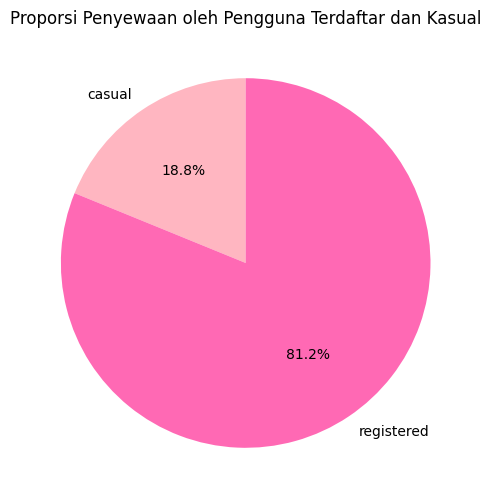

In [44]:
user_counts = day_data[['casual', 'registered']].sum()

plt.figure(figsize=(8, 6))
user_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FFB6C1', '#FF69B4'])  # Mengubah warna ke pink muda dan pink tua
plt.title('Proporsi Penyewaan oleh Pengguna Terdaftar dan Kasual')
plt.ylabel('')

plt.show()

Berdasarkan grafik pie tersebut, dapat diketahui bahwa pengguna terdaftar mendominasi aktivitas penyewaan sepeda, dengan pengguna kasual hanya sekitar 18.8% dari total penyewaan. Hal ini menunjukkan bahwa mayoritas penyewaan sepeda dilakukan oleh pengguna terdaftar, yang mungkin memiliki kecenderungan untuk menggunakan layanan ini secara lebih rutin. Data ini dapat memberikan wawasan berharga bagi pengelola layanan penyewaan sepeda untuk merancang strategi yang lebih efektif dalam menarik pengguna kasual, seperti penawaran khusus atau promosi untuk meningkatkan frekuensi penyewaan mereka.

## Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

Proses ini menghitung jumlah total penyewaan sepeda berdasarkan kondisi cuaca (weathersit) akan dihitung menggunakan data dari hour_data. Hasil perhitungan tersebut kemudian akan divisualisasikan melalui grafik histogram untuk memberikan gambaran yang lebih jelas.

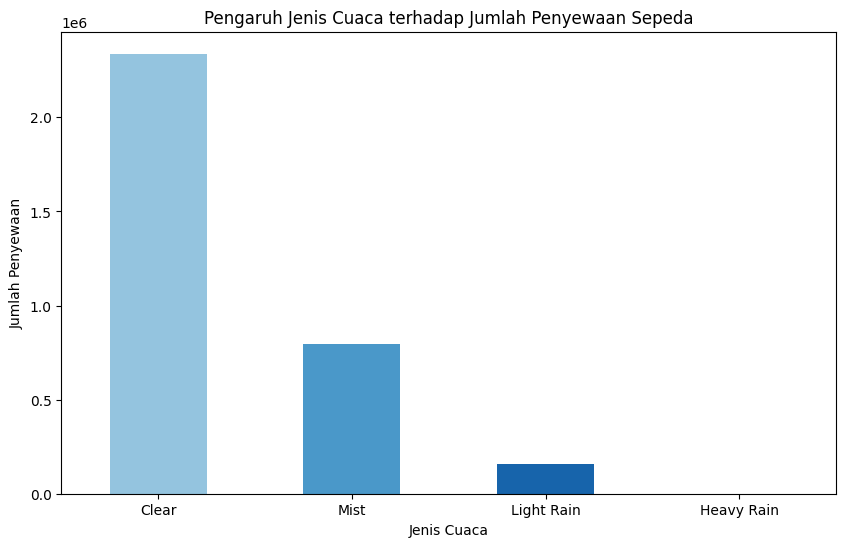

In [46]:
    weather_counts = hour_data.groupby('weathersit')['cnt'].sum()
    
    plt.figure(figsize=(10, 6))
    colors = plt.cm.Blues(np.linspace(0.4, 1, len(weather_counts)))
    weather_counts.plot(kind='bar', color=colors)
    
    plt.title('Pengaruh Jenis Cuaca terhadap Jumlah Penyewaan Sepeda')
    plt.xlabel('Jenis Cuaca')
    plt.ylabel('Jumlah Penyewaan')
    plt.xticks(ticks=np.arange(len(weather_counts)), labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'], rotation=0)
    
    plt.show()

Hasil grafik batang memperlihatkan jumlah penyewaan sepeda berdasarkan kondisi cuaca. Grafik menunjukkan bahwa kondisi cuaca 1 (Cerah, Beberapa awan, Berawan sebagian) memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan dengan kondisi cuaca lainnya (2, 3, dan 4). Dari sini, dapat disimpulkan bahwa cuaca yang cerah sangat mempengaruhi keputusan orang untuk menyewa sepeda.

**Insight:**

- Pola Penyewaan Sepeda Berdasarkan Musim: Data menunjukkan bahwa penyewaan sepeda meningkat secara signifikan selama bulan-bulan tertentu, terutama dari Mei hingga Agustus, yang menandakan periode puncak. Hal ini mengindikasikan peluang untuk memperkuat strategi pemasaran dan promosi selama musim tersebut.
- Frekuensi Penyewaan oleh Pengguna Terdaftar dibandingkan Pengguna Kasual: Sebagian besar penyewaan sepeda berasal dari pengguna terdaftar, yang mencakup 81,2% dari total penyewaan. Ini menunjukkan perlunya fokus pada peningkatan kepuasan dan retensi pengguna terdaftar, sekaligus menarik lebih banyak pengguna kasual.
- Pengaruh Cuaca terhadap Rata-rata Penyewaan Sepeda: Penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca, dengan penyewaan tertinggi terjadi saat cuaca cerah (weathersit 1). Hal ini menunjukkan pentingnya pemantauan ramalan cuaca dan kemungkinan melakukan promosi saat diperkirakan cuaca baik, guna meningkatkan jumlah penyewaan.

# Analisis Lanjutan (Opsional)

## Melakukan RFM Analisis

**RFM (Recency, Frequency, Monetary) Analysis** adalah metode yang digunakan untuk mengelompokkan pelanggan berdasarkan kebiasaan belanja mereka. Dengan analisis RFM, kita bisa mengevaluasi seberapa baru pelanggan melakukan transaksi, seberapa sering mereka bertransaksi, dan seberapa besar nilai pembelian mereka. Dalam konteks penyewaan sepeda, analisis ini dapat membantu kita mengenali segmen pelanggan yang paling berharga dan menyusun strategi pemasaran yang lebih tepat sasaran.

**Menghitung RFM**

In [47]:
rfm_data = day_data.groupby(by="registered", as_index=False).agg({"dteday": "max", "cnt": "sum"})
rfm_data.columns = ["customer_id", "max_rental_date", "monetary"]

recent_date = day_data['dteday'].max()
rfm_data['max_rental_date'] = pd.to_datetime(rfm_data['max_rental_date'])
rfm_data["recency"] = rfm_data["max_rental_date"].apply(lambda x: (recent_date - x).days)

rfm_data['frequency'] = day_data.groupby('registered')['cnt'].count().values

rfm_data.drop("max_rental_date", axis=1, inplace=True)

print(rfm_data.head())

   customer_id  monetary  recency  frequency
0           20        22       63          1
1          416       431      704          1
2          432       441        5          1
3          451       754      372          1
4          472       506      705          1


Visualisasi dengan Bar Plot

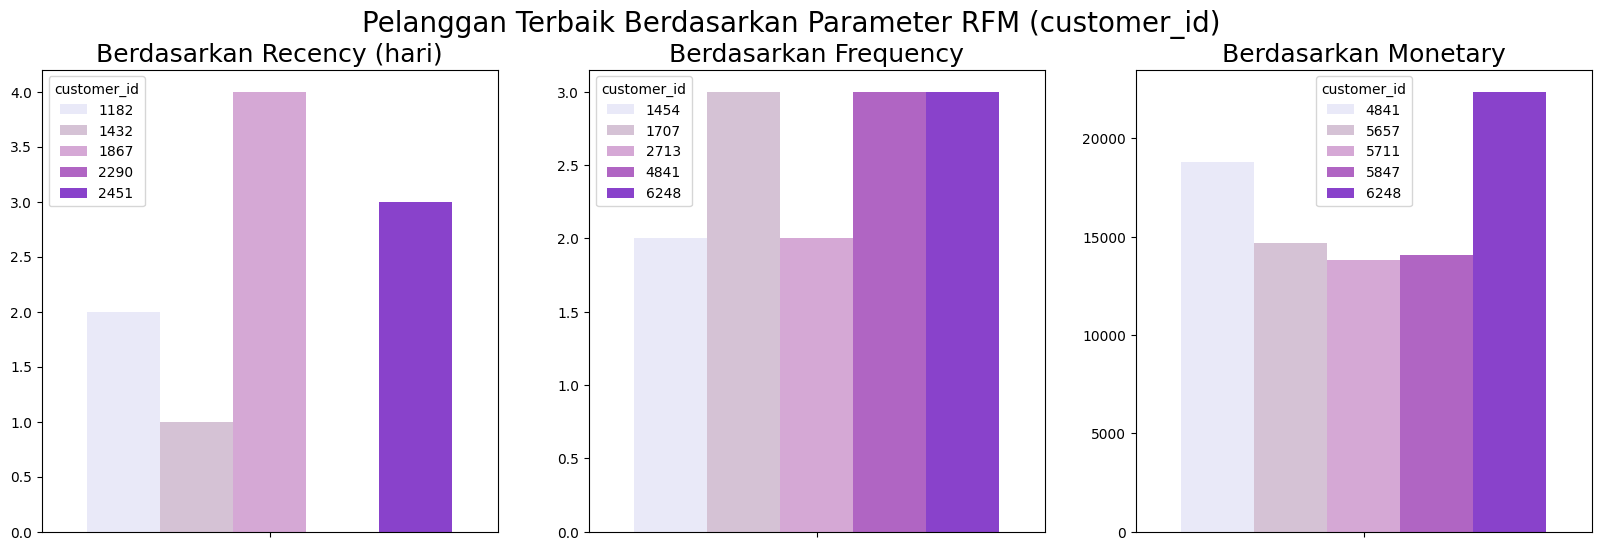

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

colors = ["#E6E6FA", "#D8BFD8", "#DDA0DD", "#BA55D3", "#8A2BE2"]

sns.barplot(y="recency", hue="customer_id", data=rfm_data.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Berdasarkan Recency (hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", hue="customer_id", data=rfm_data.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Berdasarkan Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", hue="customer_id", data=rfm_data.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Berdasarkan Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Pelanggan Terbaik Berdasarkan Parameter RFM (customer_id)", fontsize=20)
plt.show()


# Conclusion

1. Pola Musiman Penyewaan Sepeda:

- Penyewaan sepeda menunjukkan pola musiman yang jelas, dengan peningkatan tajam pada musim semi dan musim panas, khususnya antara Mei hingga Agustus, dan mencapai puncaknya pada bulan Agustus. Setelah musim panas, terjadi penurunan penyewaan secara bertahap hingga Desember, menunjukkan bahwa musim dingin memiliki tingkat penyewaan yang lebih rendah.
- Rekomendasi: Untuk memanfaatkan puncak penyewaan di musim panas, strategi pemasaran harus difokuskan pada periode tersebut. Taktik seperti menawarkan promo khusus, mengadakan acara komunitas, dan berkolaborasi dengan tempat wisata lokal dapat menarik lebih banyak pengguna.

2. Perbedaan antara Pengguna Terdaftar dan Kasual:
- Analisis menunjukkan bahwa pengguna terdaftar melakukan penyewaan jauh lebih sering dibandingkan dengan pengguna kasual, dengan kontribusi 81,2% dari pengguna terdaftar dan hanya 18,8% dari pengguna kasual. Ini menunjukkan bahwa pengguna terdaftar merupakan segmen yang lebih aktif dalam penyewaan sepeda.
- Rekomendasi: Fokus utama strategi pemasaran harus pada upaya untuk meningkatkan retensi dan kepuasan pengguna terdaftar. Ini dapat dicapai melalui program loyalitas, pengumpulan umpan balik pengguna, dan penawaran eksklusif yang mendorong pengguna terdaftar untuk terus menggunakan layanan.

3. Pengaruh Cuaca terhadap Penyewaan:
- Cuaca terbukti memiliki pengaruh signifikan terhadap rata-rata penyewaan sepeda. Penyewaan mencapai tingkat tertinggi pada cuaca cerah atau berawan ringan, sementara pada kondisi cuaca buruk seperti hujan lebat atau badai, jumlah penyewaan menurun drastis.
- Rekomendasi: Memantau kondisi cuaca dan mengoptimalkan promosi saat ramalan cuaca menunjukkan kondisi yang baik untuk bersepeda sangat penting. Kampanye pemasaran yang terfokus pada hari-hari dengan cuaca baik dapat membantu meningkatkan penyewaan, serta memberikan informasi cuaca terkini kepada pengguna.

In [52]:
all_data = pd.concat([day_data, hour_data], axis=0)

In [53]:
all_data.to_csv("data_all.csv", index=False)